### Its doing something right

It's working, the noise is a bit odd. Will investigate
the performance soon.

Sometimes the MF regressor creates massive noise in the predictions

In [1]:
using Plots
using MLMetrics;
include("Mondrian_Forest_Regressor.jl")


Use "abstract type AvgMode end" instead.

Use "abstract type AbstractBinary end" instead.

Use "abstract type AbstractMultiClass end" instead.

Use "MultiClass{T,N}(...) where {T,N}" instead.


predict! (generic function with 3 methods)

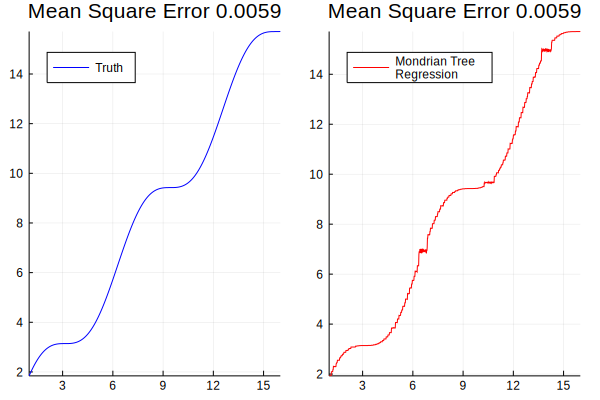

In [2]:
X = collect(linspace(1,16,1000))
Y = X+sin.(X)

MT = Mondrian_Tree_Regressor()
train!(MT, X, Y, 1e3, 10);

y = predict!(MT,X);

err = round(mean_squared_error(Y,y),6)

p1 = plot(X,Y, label="Truth", color="blue");
p2 = plot(X,y, label="Mondrian Tree  \nRegression",color="red");
plot(p1,p2,legend=:topleft)

title!("Mean Square Error $err")

Plot{Plots.GRBackend() n=2}


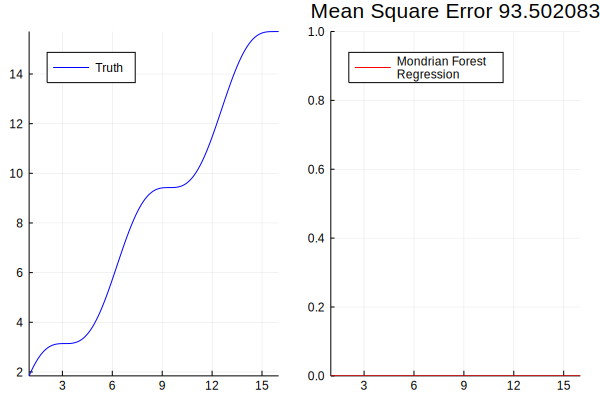

In [5]:
X = collect(linspace(1,16,1000))
Y = X+sin.(X)

MF = Mondrian_Forest_Regressor()
train!(MF, X, Y, 1e6, 10);

y = predict!(MF,X);

err = round(mean_squared_error(Y,y),6)

p1 = plot(X,Y, label="Truth", color="blue");
p2 = plot(X,y, label="Mondrian Forest  \nRegression",color="red");
title!("Mean Square Error $err")


plot(p1,p2,legend=:topleft)

### For investigating the zero prediction error

In [2]:
function predict!{X<:Array{<: AbstractFloat} where N,}(
                  MF::Mondrian_Forest_Regressor,
                  Data::X)
    pred = zeros(MF.n_trees,size(Data,1))
    for item in enumerate(MF.Trees)
        pred[item[1],:] = predict!(item[2], Data)
    end
    p = []
    for i in 1:size(Data,1)
        push!(p, mean(pred[:,i]))
    end
    return p
end

predict! (generic function with 3 methods)

In [44]:
function predict!{X<:Array{<: AbstractFloat} where N,}(
                  MF::Mondrian_Forest_Regressor,
                  Data::X)
    pred = zeros(MF.n_trees,size(Data,1))
    for item in enumerate(MF.Trees)
        pred[item[1],:] = predict!(item[2], Data)
    end
#     p = []
#     for i in 1:size(Data,1)
#         push!(p, mean(pred[:,i]))
#     end
    return reshape(mean(pred,1),size(Data,1))
end

predict! (generic function with 3 methods)

In [7]:
function predict!{X<:Array{<: AbstractFloat} where N,}(
                  MF::Mondrian_Forest_Regressor,
                  Data::X)
    pred = zeros(MF.n_trees,size(Data,1))
    for item in enumerate(MF.Trees)
        pred[item[1],:] = predict_reg_batch(item[2].Tree, Data)
    end
    p = []
    for i in 1:size(Data,1)
        push!(p, mean(pred[:,i]))
    end
    return p
end

predict! (generic function with 3 methods)